In [1]:
from lib.data import *
data, raw = get_default_oec_rca_raw_data()

Se cargaron los datos desde ../data/default_oce_2018-2020.pkl


In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
import economic_complexity as ecplx

rca = ecplx.rca(data)
M = build_M_from(rca)
cant_paises = len(M.index.to_list())

In [4]:
#from informe import SimuladorEstatico, SimuladorDinamico, SimuladorComplejo, PaisNaive
from informe import *
from lib.utils import *#correr_simulacion_mostrando, cantidad_descubrimientos_iteracion

Usando el valor de $\Omega$ hallado nos preguntamos como afecta la estrategia en la evolución en complejidad de los paises.

Para esto dividimos en dos porciones los paises según dos clases, el 50% más complejos -o centrales- y el 50% menos complejos -o periféricos- y probamos asignarle a cada clase un distinto tiempo de estrategia. 

Para eso primero necesitamos obtener la distribución de complejidades para cada país:

In [5]:
ECI, PCI = ecplx.complexity(M)

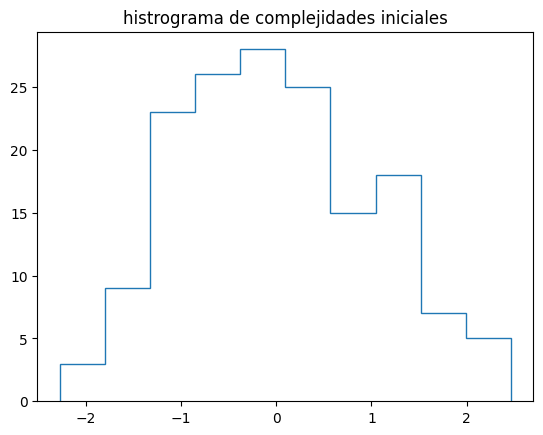

In [6]:
counts, bins = np.histogram(list(ECI), 10)
plt.title("histrograma de complejidades iniciales")
plt.stairs(counts, bins)

lo que es bastante aproximado a lo esperado:
![image.png](attachment:c07f20e8-0e32-4864-b7af-bc10d9f6a727.png)

 una distribución normal ~(0,1)

In [7]:
np.std(ECI)

0.9968503858773891

In [8]:
from informe import PaisCigarra, PaisHormiga

iteraciones = 35
omega = 0.55

def pais_factory_segun_complejidad(clase_periferico, clase_central):
    return lambda **constructor_args: clase_central(**constructor_args) \
                                      if constructor_args["eci"] > 0 else clase_periferico(**constructor_args)

In [9]:
sim_perifericosHormigas_centralesHormigas = \
    SimuladorComplejo(lambda step: step >= iteraciones, 
                      pais_factory_segun_complejidad(clase_periferico=PaisHormiga, clase_central=PaisHormiga), 
                      M.copy(deep=True), omega)
sim_perifericosHormigas_centralesCigarras = \
    SimuladorComplejo(lambda step: step >= iteraciones, 
                      pais_factory_segun_complejidad(clase_periferico=PaisHormiga, clase_central=PaisCigarra), 
                      M.copy(deep=True), omega)
sim_perifericosCigarras_centralesHormigas = \
    SimuladorComplejo(lambda step: step >= iteraciones, 
                      pais_factory_segun_complejidad(clase_periferico=PaisCigarra, clase_central=PaisHormiga), 
                      M.copy(deep=True), omega)
sim_perifericosCigarras_centralesCigarras = \
    SimuladorComplejo(lambda step: step >= iteraciones, 
                      pais_factory_segun_complejidad(clase_periferico=PaisCigarra, clase_central=PaisCigarra), 
                      M.copy(deep=True), omega)

proximidad calculada en: 0.17420148849487305
paises creados en: 0.013764619827270508
proximidad calculada en: 0.17376303672790527
paises creados en: 0.014373302459716797
proximidad calculada en: 0.16622519493103027
paises creados en: 0.013796806335449219
proximidad calculada en: 0.17131805419921875
paises creados en: 0.015070199966430664


In [10]:
from lib.utils import correr_simulacion_mostrando

def pais_eci_collector(output, pais, productos_terminados):
    output[pais] = (pais.get_eci(), productos_terminados)

def default_formatter(pais, eci_prod_terminados, pad):
    return f"\t{str(pais):-<{pad}}> eci {eci_prod_terminados[0]:.4f} descubrió: {len(eci_prod_terminados[1])} investigando: {len(pais.productos_en_investigacion())}"

res_perifericosHormigas_centralesHormigas = correr_simulacion_mostrando(sim_perifericosHormigas_centralesHormigas, collector=pais_eci_collector, formatter=default_formatter)
print("#################################### simulación hormigas hormigas terminada #################################")
res_perifericosHormigas_centralesCigarras = correr_simulacion_mostrando(sim_perifericosHormigas_centralesCigarras, collector=pais_eci_collector, formatter=default_formatter)
print("#################################### simulación hormigas cigarras terminada #################################")
res_perifericosCigarras_centralesHormigas = correr_simulacion_mostrando(sim_perifericosCigarras_centralesHormigas, collector=pais_eci_collector, formatter=default_formatter)
print("#################################### simulación cigarras hormigas terminada #################################")
res_perifericosCigarras_centralesCigarras = correr_simulacion_mostrando(sim_perifericosCigarras_centralesCigarras, collector=pais_eci_collector, formatter=default_formatter)
print("#################################### simulación cigarras cigarras terminada #################################")

empezando simulación: 2024-07-01 12:15:47
iteración: 1
	PaisHormiga(Afghanistan)----------------> eci -1.2152 descubrió: 0 investigando: 1
	PaisHormiga(Albania)--------------------> eci -0.3440 descubrió: 0 investigando: 11
	PaisHormiga(Algeria)--------------------> eci -1.0395 descubrió: 0 investigando: 1
	PaisHormiga(Angola)---------------------> eci -1.1399 descubrió: 0 investigando: 0
	PaisHormiga(Argentina)------------------> eci -0.1795 descubrió: 0 investigando: 6
	PaisHormiga(Armenia)--------------------> eci -0.1176 descubrió: 0 investigando: 9
	PaisHormiga(Australia)------------------> eci -0.5632 descubrió: 0 investigando: 5
	PaisHormiga(Austria)--------------------> eci 1.6909 descubrió: 0 investigando: 12
	PaisHormiga(Azerbaijan)-----------------> eci -0.8728 descubrió: 0 investigando: 2
	PaisHormiga(Bahamas)--------------------> eci 0.6326 descubrió: 0 investigando: 6
	PaisHormiga(Bahrain)--------------------> eci 0.5308 descubrió: 0 investigando: 10
	PaisHormiga(Banglade

In [11]:
# para cada iteración, me quedo con la dispersión:
def obtener_complejidades(data):
    res = []
    for iteracion in data:
        eci_it = np.array([eci for eci, _ in iteracion.values()])
        res.append(eci_it)
    return res

comp_perifericosHormigas_centralesHormigas = obtener_complejidades(res_perifericosHormigas_centralesHormigas)
comp_perifericosHormigas_centralesCigarras = obtener_complejidades(res_perifericosHormigas_centralesCigarras)
comp_perifericosCigarras_centralesHormigas = obtener_complejidades(res_perifericosCigarras_centralesHormigas)
comp_perifericosCigarras_centralesCigarras = obtener_complejidades(res_perifericosCigarras_centralesCigarras)

In [12]:
comp_perifericosHormigas_centralesHormigas

[array([-1.21518207, -0.34403057, -1.03954786, -1.13990654, -0.1795175 ,
        -0.11763378, -0.56324305,  1.69093703, -0.87279477,  0.6325915 ,
         0.53079369, -0.79544309,  0.92530567,  1.24269612, -0.48795022,
        -1.04702803,  0.611169  , -0.77395428,  0.24535462,  0.49716217,
         0.58573475, -1.55214587, -0.8722705 , -0.57212804, -1.14401282,
         0.56791384,  0.21651651, -2.27339722, -0.24997247,  1.24806389,
         2.35818435,  0.23577558,  0.257417  , -0.97661347,  0.86360188,
        -0.63973247,  0.43646075,  1.68391554, -1.01025016,  1.06674602,
        -0.12983504, -0.86439568, -0.12329234,  0.14190531, -1.84088449,
         1.03346726,  0.22908533, -0.76082284, -0.2713261 ,  1.52212175,
         1.41508772, -0.65020826, -0.18573995,  2.02374729, -1.21219947,
         0.18159617, -1.35099832, -0.23486344, -1.47356404, -1.19964029,
        -0.79440893, -0.3646685 ,  1.22793462,  1.42188047,  0.33949742,
         0.52214003, -0.03178322, -0.13323264, -0.9

In [13]:
res_perifericosHormigas_centralesHormigas

[{<informe.PaisHormiga at 0x72f83bb9e9e0>: (-1.2151820657187424, []),
  <informe.PaisHormiga at 0x72f83bb9e6b0>: (-0.3440305718689615, []),
  <informe.PaisHormiga at 0x72f83bb9e7a0>: (-1.0395478566628797, []),
  <informe.PaisHormiga at 0x72f83bb9f010>: (-1.139906536675698, []),
  <informe.PaisHormiga at 0x72f83bb9df30>: (-0.17951749772442566, []),
  <informe.PaisHormiga at 0x72f83bb9efe0>: (-0.11763377770885733, []),
  <informe.PaisHormiga at 0x72f83bb9f0a0>: (-0.5632430529761895, []),
  <informe.PaisHormiga at 0x72f83bb9e740>: (1.690937031978024, []),
  <informe.PaisHormiga at 0x72f83bb9f160>: (-0.8727947661629551, []),
  <informe.PaisHormiga at 0x72f83bb9e9b0>: (0.6325914980459536, []),
  <informe.PaisHormiga at 0x72f83bb9e200>: (0.5307936942962616, []),
  <informe.PaisHormiga at 0x72f83bb9ded0>: (-0.7954430873059571, []),
  <informe.PaisHormiga at 0x72f83bb9f040>: (0.9253056690963005, []),
  <informe.PaisHormiga at 0x72f83bb9e950>: (1.2426961164041903, []),
  <informe.PaisHormiga at

In [14]:
comp_perifericosCigarras_centralesHormigas

[array([-1.21518207, -0.34403057, -1.03954786, -1.13990654, -0.1795175 ,
        -0.11763378, -0.56324305,  1.69093703, -0.87279477,  0.6325915 ,
         0.53079369, -0.79544309,  0.92530567,  1.24269612, -0.48795022,
        -1.04702803,  0.611169  , -0.77395428,  0.24535462,  0.49716217,
         0.58573475, -1.55214587, -0.8722705 , -0.57212804, -1.14401282,
         0.56791384,  0.21651651, -2.27339722, -0.24997247,  1.24806389,
         2.35818435,  0.23577558,  0.257417  , -0.97661347,  0.86360188,
        -0.63973247,  0.43646075,  1.68391554, -1.01025016,  1.06674602,
        -0.12983504, -0.86439568, -0.12329234,  0.14190531, -1.84088449,
         1.03346726,  0.22908533, -0.76082284, -0.2713261 ,  1.52212175,
         1.41508772, -0.65020826, -0.18573995,  2.02374729, -1.21219947,
         0.18159617, -1.35099832, -0.23486344, -1.47356404, -1.19964029,
        -0.79440893, -0.3646685 ,  1.22793462,  1.42188047,  0.33949742,
         0.52214003, -0.03178322, -0.13323264, -0.9

In [15]:
comp_perifericosCigarras_centralesCigarras

[array([-1.21518207, -0.34403057, -1.03954786, -1.13990654, -0.1795175 ,
        -0.11763378, -0.56324305,  1.69093703, -0.87279477,  0.6325915 ,
         0.53079369, -0.79544309,  0.92530567,  1.24269612, -0.48795022,
        -1.04702803,  0.611169  , -0.77395428,  0.24535462,  0.49716217,
         0.58573475, -1.55214587, -0.8722705 , -0.57212804, -1.14401282,
         0.56791384,  0.21651651, -2.27339722, -0.24997247,  1.24806389,
         2.35818435,  0.23577558,  0.257417  , -0.97661347,  0.86360188,
        -0.63973247,  0.43646075,  1.68391554, -1.01025016,  1.06674602,
        -0.12983504, -0.86439568, -0.12329234,  0.14190531, -1.84088449,
         1.03346726,  0.22908533, -0.76082284, -0.2713261 ,  1.52212175,
         1.41508772, -0.65020826, -0.18573995,  2.02374729, -1.21219947,
         0.18159617, -1.35099832, -0.23486344, -1.47356404, -1.19964029,
        -0.79440893, -0.3646685 ,  1.22793462,  1.42188047,  0.33949742,
         0.52214003, -0.03178322, -0.13323264, -0.9

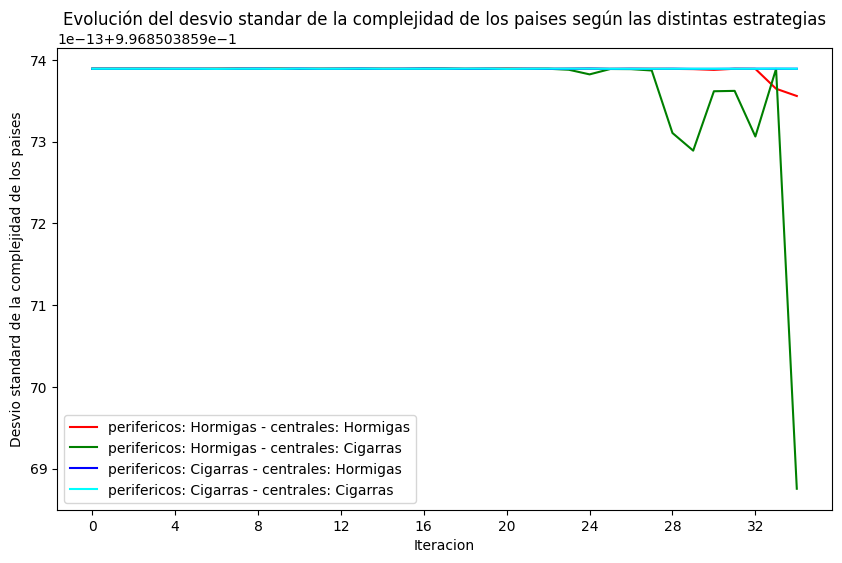

In [16]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 6))
fig.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

stds_sH_cH = [np.std(x) for x in comp_perifericosHormigas_centralesHormigas]
stds_sH_cC = [np.std(x) for x in comp_perifericosHormigas_centralesCigarras]
stds_sC_cH = [np.std(x) for x in comp_perifericosCigarras_centralesHormigas]
stds_sC_cC = [np.std(x) for x in comp_perifericosCigarras_centralesCigarras]

plt.plot(range(len(comp_perifericosHormigas_centralesHormigas)), stds_sH_cH, 
         label='perifericos: Hormigas - centrales: Hormigas', color = "r", linestyle='-')
plt.plot(range(len(comp_perifericosHormigas_centralesCigarras)), stds_sH_cC, 
         label='perifericos: Hormigas - centrales: Cigarras', color = "g", linestyle='-')
plt.plot(range(len(comp_perifericosCigarras_centralesHormigas)), stds_sC_cH, 
         label='perifericos: Cigarras - centrales: Hormigas', color = "b", linestyle='-')
plt.plot(range(len(comp_perifericosCigarras_centralesCigarras)), stds_sC_cC, 
         label='perifericos: Cigarras - centrales: Cigarras', color = "cyan", linestyle='-')
plt.xlabel('Iteracion')
plt.ylabel('Desvio standard de la complejidad de los paises')
plt.title('Evolución del desvio standar de la complejidad de los paises según las distintas estrategias')
plt.legend()
plt.show()

In [17]:
def gini_coefficient(x):
    """Compute Gini coefficient of array of values
    https://stackoverflow.com/a/61154922
    """
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.abs(np.mean(x)))

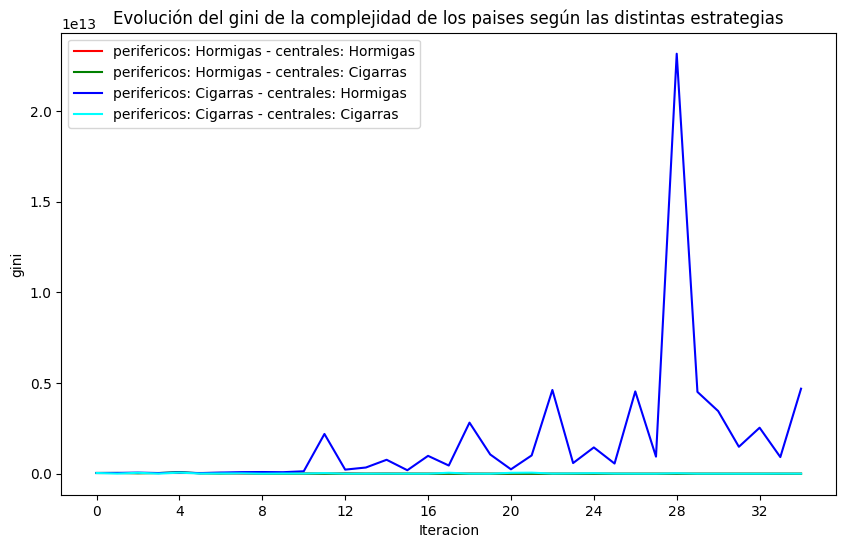

In [26]:
fig = plt.figure(figsize=(10, 6))
fig.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

gini_sH_cH = [gini_coefficient(x) for x in comp_perifericosHormigas_centralesHormigas]
gini_sH_cC = [gini_coefficient(x) for x in comp_perifericosHormigas_centralesCigarras]
gini_sC_cH = [gini_coefficient(x) for x in comp_perifericosCigarras_centralesHormigas]
gini_sC_cC = [gini_coefficient(x) for x in comp_perifericosCigarras_centralesCigarras]


plt.plot(range(len(comp_perifericosHormigas_centralesHormigas)), gini_sH_cH, 
         label='perifericos: Hormigas - centrales: Hormigas', color = "r", linestyle='-')
plt.plot(range(len(comp_perifericosHormigas_centralesCigarras)), gini_sH_cC, 
         label='perifericos: Hormigas - centrales: Cigarras', color = "g", linestyle='-')
plt.plot(range(len(comp_perifericosCigarras_centralesHormigas)), gini_sC_cH, 
         label='perifericos: Cigarras - centrales: Hormigas', color = "b", linestyle='-')
plt.plot(range(len(comp_perifericosCigarras_centralesCigarras)), gini_sC_cC, 
         label='perifericos: Cigarras - centrales: Cigarras', color = "cyan", linestyle='-')
plt.xlabel('Iteracion')
plt.ylabel('gini')
plt.title('Evolución del gini de la complejidad de los paises según las distintas estrategias')
savefig(plt, "estrategias-todas")
plt.legend()
plt.show()

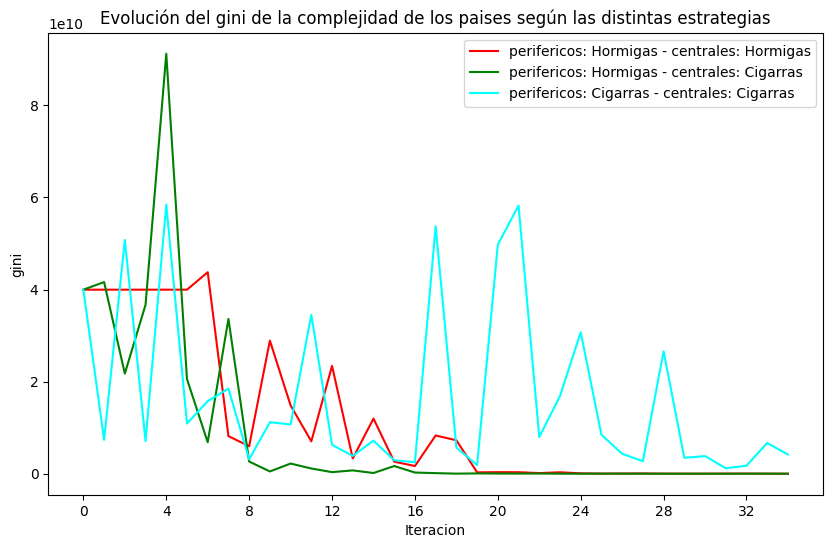

In [20]:
fig = plt.figure(figsize=(10, 6))
fig.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

gini_sH_cH = [gini_coefficient(x) for x in comp_perifericosHormigas_centralesHormigas]
gini_sH_cC = [gini_coefficient(x) for x in comp_perifericosHormigas_centralesCigarras]
gini_sC_cH = [gini_coefficient(x) for x in comp_perifericosCigarras_centralesHormigas]
gini_sC_cC = [gini_coefficient(x) for x in comp_perifericosCigarras_centralesCigarras]


plt.plot(range(len(comp_perifericosHormigas_centralesHormigas)), gini_sH_cH, 
         label='perifericos: Hormigas - centrales: Hormigas', color = "r", linestyle='-')
plt.plot(range(len(comp_perifericosHormigas_centralesCigarras)), gini_sH_cC, 
         label='perifericos: Hormigas - centrales: Cigarras', color = "g", linestyle='-')
#plt.plot(range(len(comp_perifericosCigarras_centralesHormigas)), gini_sC_cH, 
#         label='perifericos: Cigarras - centrales: Hormigas', color = "b", linestyle='-')
plt.plot(range(len(comp_perifericosCigarras_centralesCigarras)), gini_sC_cC, 
         label='perifericos: Cigarras - centrales: Cigarras', color = "cyan", linestyle='-')
plt.xlabel('Iteracion')
plt.ylabel('gini')
plt.title('Evolución del gini de la complejidad de los paises según las distintas estrategias')
savefig(plt, "estrategias-gini-3-estrategias")
plt.legend()
plt.show()

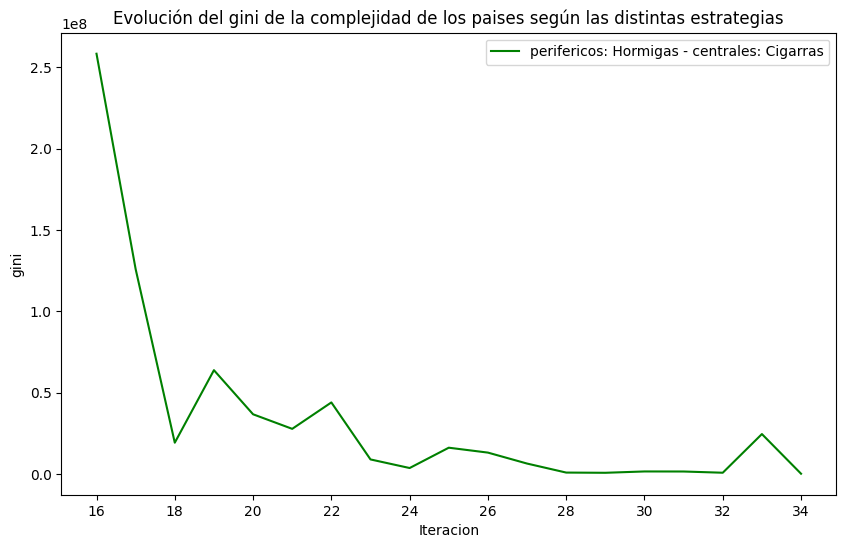

In [25]:
fig = plt.figure(figsize=(10, 6))
fig.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

gini_sH_cH = [gini_coefficient(x) for x in comp_perifericosHormigas_centralesHormigas]
gini_sH_cC = [gini_coefficient(x) for x in comp_perifericosHormigas_centralesCigarras]
gini_sC_cH = [gini_coefficient(x) for x in comp_perifericosCigarras_centralesHormigas]
gini_sC_cC = [gini_coefficient(x) for x in comp_perifericosCigarras_centralesCigarras]


#plt.plot(range(len(comp_perifericosHormigas_centralesHormigas)), gini_sH_cH, 
#         label='perifericos: Hormigas - centrales: Hormigas', color = "r", linestyle='-')
plt.plot(range(16, len(comp_perifericosHormigas_centralesCigarras)),gini_sH_cC[16:], 
         label='perifericos: Hormigas - centrales: Cigarras', color = "g", linestyle='-')
#plt.plot(range(len(comp_perifericosCigarras_centralesHormigas)), gini_sC_cH, 
#         label='perifericos: Cigarras - centrales: Hormigas', color = "b", linestyle='-')
#plt.plot(range(len(comp_perifericosCigarras_centralesCigarras)), gini_sC_cC, 
#         label='perifericos: Cigarras - centrales: Cigarras', color = "cyan", linestyle='-')
plt.xlabel('Iteracion')
plt.ylabel('gini')
plt.title('Evolución del gini de la complejidad de los paises según las distintas estrategias')
savefig(plt, "estrategia-cola-de-mas-estable")
plt.legend()
plt.show()

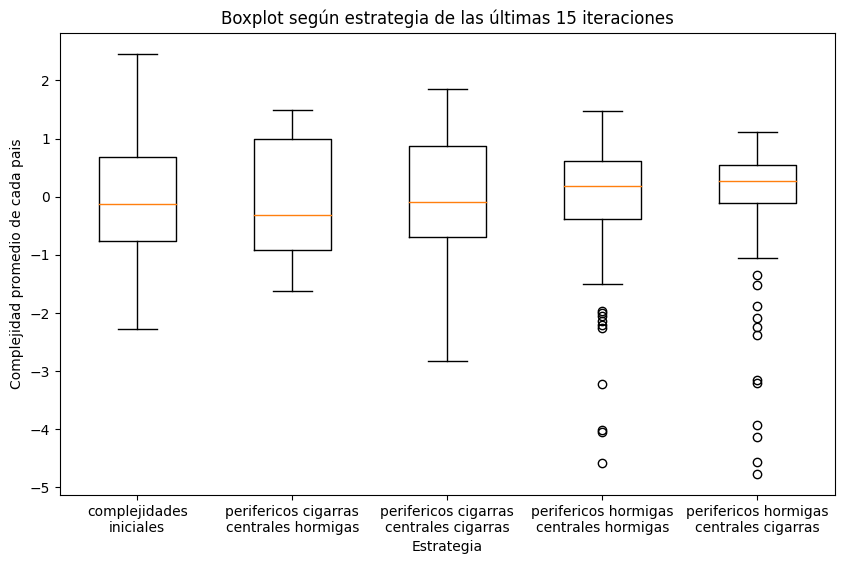

In [27]:
ultimas_its=15
strat_std = {}
strat_std["complejidades\niniciales"] = ECI
strat_std["perifericos cigarras\ncentrales hormigas"] = np.vstack(comp_perifericosCigarras_centralesHormigas[-ultimas_its:-1]).mean(axis=0)
strat_std["perifericos cigarras\ncentrales cigarras"] = np.vstack(comp_perifericosCigarras_centralesCigarras[-ultimas_its:-1]).mean(axis=0)

strat_std["perifericos hormigas\ncentrales hormigas"] = np.vstack(comp_perifericosHormigas_centralesHormigas[-ultimas_its:-1]).mean(axis=0)
strat_std["perifericos hormigas\ncentrales cigarras"] = np.vstack(comp_perifericosHormigas_centralesCigarras[-ultimas_its:-1]).mean(axis=0)

fig = plt.figure(figsize=(10, 6))
ax = plt.boxplot(strat_std.values())
fig.gca().set_xticklabels(list(strat_std.keys()))
plt.xlabel('Estrategia')
plt.ylabel('Complejidad promedio de cada pais')
plt.title(f'Boxplot según estrategia de las últimas {ultimas_its} iteraciones')
savefig(plt, f"estrategias-boxplot-ultimas-{ultimas_its}")
plt.show()

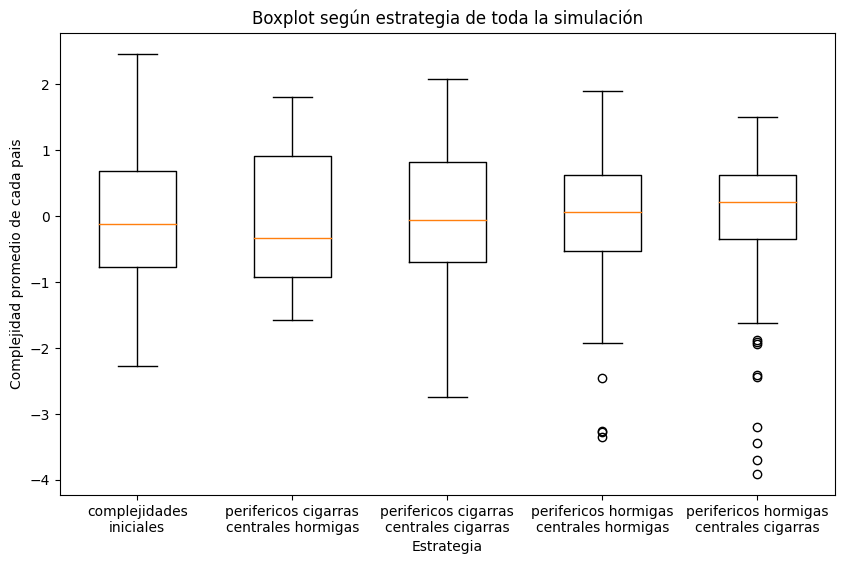

In [28]:
strat_std = {}
strat_std["complejidades\niniciales"] = ECI
strat_std["perifericos cigarras\ncentrales hormigas"] = np.vstack(comp_perifericosCigarras_centralesHormigas).mean(axis=0)
strat_std["perifericos cigarras\ncentrales cigarras"] = np.vstack(comp_perifericosCigarras_centralesCigarras).mean(axis=0)

strat_std["perifericos hormigas\ncentrales hormigas"] = np.vstack(comp_perifericosHormigas_centralesHormigas).mean(axis=0)
strat_std["perifericos hormigas\ncentrales cigarras"] = np.vstack(comp_perifericosHormigas_centralesCigarras).mean(axis=0)

fig = plt.figure(figsize=(10, 6))
ax = plt.boxplot(strat_std.values())
fig.gca().set_xticklabels(list(strat_std.keys()))
plt.xlabel('Estrategia')
plt.ylabel('Complejidad promedio de cada pais')
plt.title(f'Boxplot según estrategia de toda la simulación')
savefig(plt, "extrategias-boxplot-todas-las-iteraciones")
plt.show()

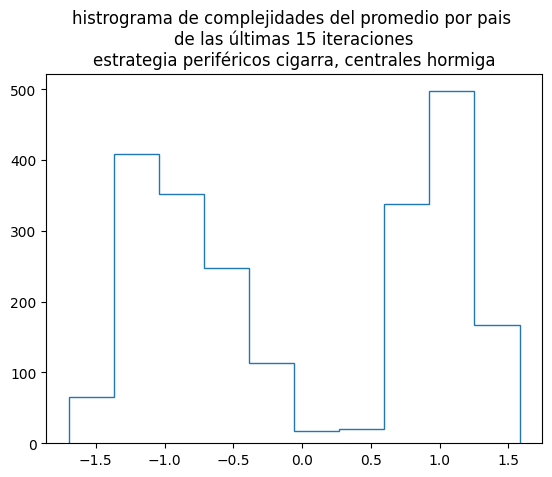

In [43]:
counts, bins = np.histogram(np.vstack(comp_perifericosCigarras_centralesHormigas[-ultimas_its:-1]), 10)
plt.title(f"""histrograma de complejidades del promedio por pais 
de las últimas {ultimas_its} iteraciones
estrategia periféricos cigarra, centrales hormiga""")
plt.stairs(counts, bins)
savefig(plt, "estrategia-histograma-complejidades-camello")


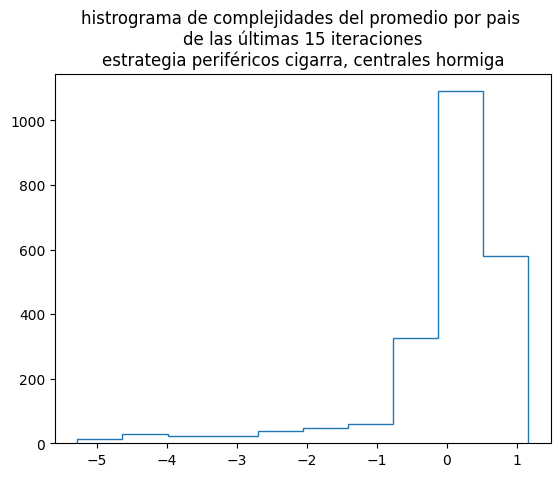

In [44]:
counts, bins = np.histogram(np.vstack(comp_perifericosHormigas_centralesCigarras[-ultimas_its:-1]), 10)
plt.title(f"""histrograma de complejidades del promedio por pais 
de las últimas {ultimas_its} iteraciones
estrategia periféricos cigarra, centrales hormiga""")
plt.stairs(counts, bins)
savefig(plt, "estrategia-histograma-complejidades")

In [30]:
a = np.array([1,2,3])
b = np.array([2,3,4])

ab = np.vstack((a, b))

In [31]:
ab.mean(axis=0)

array([1.5, 2.5, 3.5])

In [32]:
np.vstack([[1,2,3], [2,3,4]]).mean(axis=0)

array([1.5, 2.5, 3.5])

In [33]:
gini_coefficient(np.array([-1,-2,5,-6,-1]))

1.84

In [34]:
def gini(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

gini(np.array([-1,-2,5,-6,-1]))

-1.84